# Метод Ньютона

Задание

1. ответить на все вопросы в скрипте
2. изменить код метода Ньютона так, чтобы он смог разрешать все проблемные случаи, возникающие в скрипте, продемонстрировать это, объяснить почему модификация решает проблему. Проблемы - нулевая производная, кратные корни, биения. Для кратных корней надо так модифицировать метод, чтобы порядок оставался вторым и продемонстрировать это.

ВАЖНО! 
1. Модифицированный метод Ньютона должен получаться путем добавления новых строчек в simple_newton, а не переписыванием его с нуля. Новые строчки надо прокомментировать, зачем они были добавлены.
2. Для каждого нелинейного, где есть указанные проблемы, надо привести демонстрацию решения вашим методом. Без этой демонстрации считается, что обработчик соответствующей проблемы не реализован и не оценивается.

In [160]:
# простая реализация Метода Ньютона
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

def simple_newton(func, dfunc, x, tol = 1e-12):
    sol = 0
    iteration = 0
    dxs = []
    for i in range(30):
        iteration += 1
        dx = -func(x)/dfunc(x)
        dxs.append(dx)
        x = x + dx
        #print(x)
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration, dxs]

In [208]:
#модифицированный метод ньютона
def modded_newton(func, dfunc, x, m = 1, tol = 1e-12):#m-кратность
    x_dots = [x]
    sol = 0
    iteration = 0
    dxs = []
    for i in range(70):
        iteration += 1
        if dfunc(x) == 0:
            dx = -func(x)/(0.0005)  # решение проблемы нулевой производной. Этот dx будет нижней оценкой
        else:
            dx = -func(x)/dfunc(x)
        dx = m*dx # решение проблемы кратности корня
        dxs.append(dx)
        x = x + dx
        x_dots.append(x)
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
        
        if i > 1 and x_dots[i] == x_dots[i-2]:
            x = x + 0.05     # решение проблемы биения, мы как-бы насильно выталкиваем итерации из зацикленности
        
    sol = float('nan')
    print('More then 70 iterations!')
    return [sol, iteration, dxs]

## Нелинейное уравнение 1

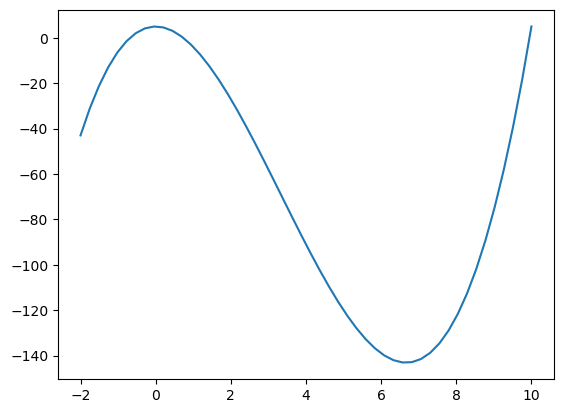

In [209]:
x = np.linspace(-2,10)
func0 = lambda x: x**3 - 10*x**2 + 5
dfunc0 = lambda x: 3*x**2 - 20*x
y = func0(x)
plt.plot(x, y)

1. Объяснить, почему различаются результаты в случае 1 и 2
2. Объяснить, что происходит в случае 3
3. Построить график порядка сходимости от номера итерации. Объяснить результат

In [210]:
data = simple_newton(func0, dfunc0, 8) # случай 1
#data = simple_newton(func0, dfunc0, 0.7) # случай 2
#data = simple_newton(func0, dfunc0, 0.0) # случай 3
print('sol = ', data[0])
print('iter = ', data[1])

sol =  9.949491057914388
iter =  7


### Почему различаются результаты в случае 1 и 2:
Вообще, у этого полинома три нуля: 
1. -0.68409 (примерное значение)
2. 0.73460  (примерное значение)
3. 9.94949  (примерное значение)

При x = 8, dx = -f(x)/df(x) < 0, поэтому по отрицательным приращениям мы находим третий корень

При x = 0.7, dx = -f(x)/df(x) > 0, поэтому по положительным прирашениям мы находим второй корень

### Объяснить, что происходит в случае 3:
Происходит деление на ноль, так как dfunc0(0.0) = 0, что не учтено в коде простой реализации

### Постросить график порядка сходимости от номера итерации, объяснить результат:

Про порядок сходимости: по определению, если $|x_{k+1} - x_p| \leq C*|x_{k} - x_p|^n$, где $C = const$ и $x_p$ - решение, то порядок сходимости равен n.
Будем считать $C = 1$, тогда положив знак равенства, получим: $ n = \frac{ln(|x_{k+1} - x_p|)}{ln(|x_{k} - x_p|)}$

In [211]:
def my_plot(func0, dfunc0, x, case, flag = 0, m = 1):
    if (flag):
        data = modded_newton(func0, dfunc0, x, m)
    else:
        data = simple_newton(func0, dfunc0, x)
    Y = list()
    for dx in (data[2]):
        Y.append((np.log(abs(x + dx - data[0])))/(np.log(abs(x - data[0]))))
        x += dx
    plt.plot(range(len(Y)), Y) 
    plt.title(f"График порядка сходимости, случай {case}")
    plt.xlabel("Число итераций")
    plt.ylabel("p - порядок сходимости")

C:\Users\glebm\AppData\Local\Temp\ipykernel_6012\1369974145.py:8: RuntimeWarning: divide by zero encountered in log
  Y.append((np.log(abs(x + dx - data[0])))/(np.log(abs(x - data[0]))))


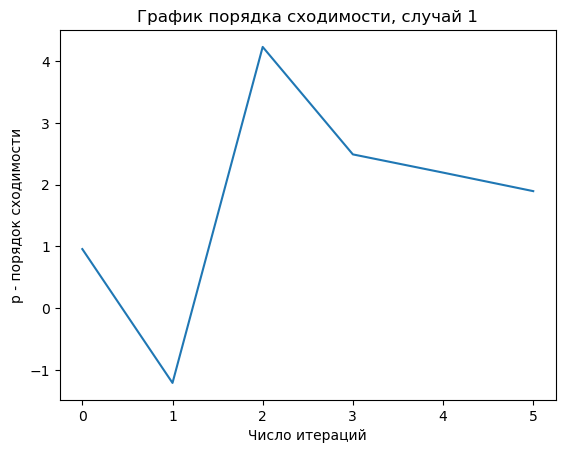

In [212]:
 my_plot(func0, dfunc0, 8, 1) # случай 1

C:\Users\glebm\AppData\Local\Temp\ipykernel_6012\1369974145.py:8: RuntimeWarning: divide by zero encountered in log
  Y.append((np.log(abs(x + dx - data[0])))/(np.log(abs(x - data[0]))))


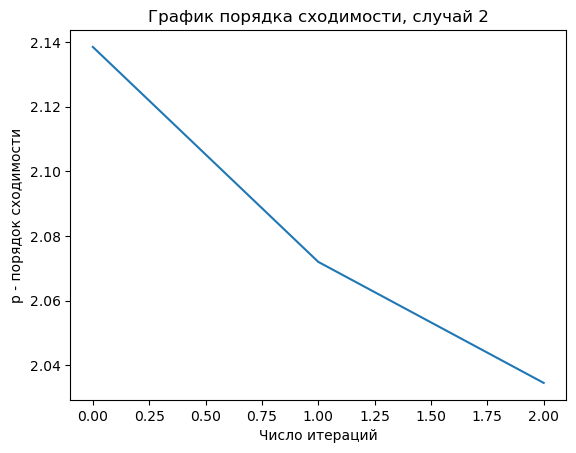

In [213]:
my_plot(func0, dfunc0, 0.7, 2, 0) # случай 2

C:\Users\glebm\AppData\Local\Temp\ipykernel_6012\1369974145.py:8: RuntimeWarning: divide by zero encountered in log
  Y.append((np.log(abs(x + dx - data[0])))/(np.log(abs(x - data[0]))))


(-1.0, 8.0)

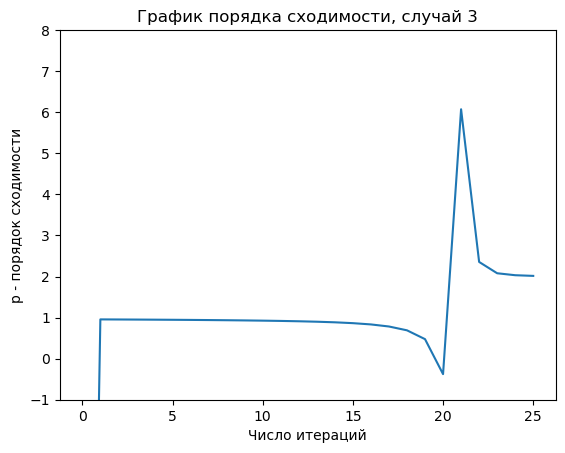

In [214]:
my_plot(func0, dfunc0, 0.0, 3, 1) # случай 3
ax = plt.gca()
ax.set_ylim([-1, 8])

Во всех трёх случаях порядок сходимости в конечном итоге стремится у двум, что ожидается исходя из теории. 

Левая часть графика (малое количество итераций) может вести себя хаотично, из-за неточности нулевого приближения и из-за неточности формулы для порядка сходимости (пологаем $C=1$ и строгое равенство для $n$).

В третьем случае на левой части графика также наблюдаются последствия нулевой производной (неточность метода следовательно). Возможно получение более позитивной картины с помощью подбора нижней границы dx в модифицированном методе Ньютона.

## Нелинейное уравнение 2

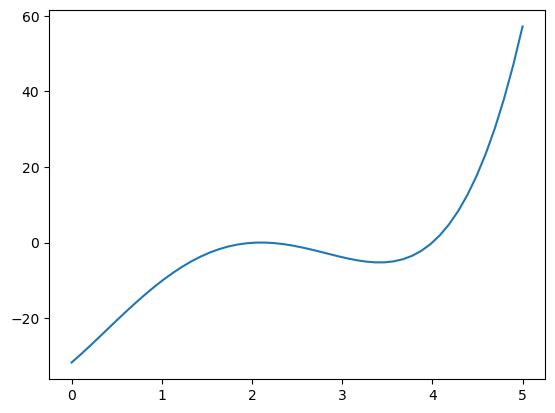

In [215]:
x = np.linspace(0,5)
func1 = lambda x: x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752 #double root
dfunc1 = lambda x: 4.0*x**3 - 19.2*x**2 + 12.9*x + 20.538
y = func1(x)
plt.plot(x, y)

1. Построить график порядка сходимости от номера итерации. Объяснить результат

In [216]:
data = simple_newton(func1, dfunc1, 2.0)
print('sol = ', data[0])
print('iter = ', data[1])

sol =  2.0999999786199406
iter =  23


C:\Users\glebm\AppData\Local\Temp\ipykernel_6012\1369974145.py:8: RuntimeWarning: divide by zero encountered in log
  Y.append((np.log(abs(x + dx - data[0])))/(np.log(abs(x - data[0]))))
C:\Users\glebm\AppData\Local\Temp\ipykernel_6012\1369974145.py:8: RuntimeWarning: invalid value encountered in scalar divide
  Y.append((np.log(abs(x + dx - data[0])))/(np.log(abs(x - data[0]))))


(-1.0, 3.0)

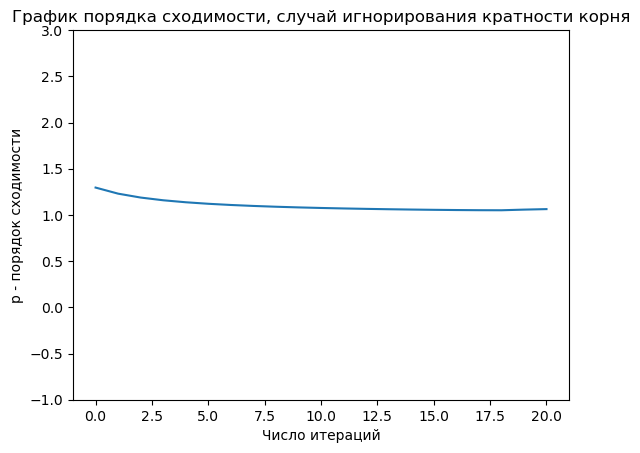

In [217]:
my_plot(func1, dfunc1, 2.0, "игнорирования кратности корня", 1, 1) # случай игнорирования кратности корня
ax = plt.gca()
ax.set_ylim([-1, 3])

C:\Users\glebm\AppData\Local\Temp\ipykernel_6012\1369974145.py:8: RuntimeWarning: divide by zero encountered in log
  Y.append((np.log(abs(x + dx - data[0])))/(np.log(abs(x - data[0]))))


(-1.0, 4.0)

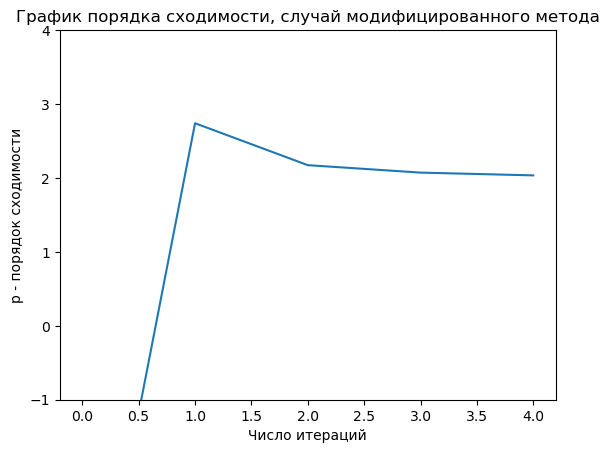

In [218]:
my_plot(func0, dfunc0, 2.0, 'модифицированного метода', 1, 1) # случай модифицированного метода
ax = plt.gca()
ax.set_ylim([-1, 4])

В случае кратного корня всё ещё можно использовать простой метод Ньютона, но скорость сходимости в таком случае будет не квадрадичной, а линейной. Если же мы хотим добиться квадратичной скорости сходимости, необходима поправка в методе, а именно: $$ x_{n+1} = x_n - m * \frac{f(x_n)}{f^{'}(x_n)} $$
Что и было реализованно в коде. Графики выше подтверждают теорию

## Нелинейное уравнение 3

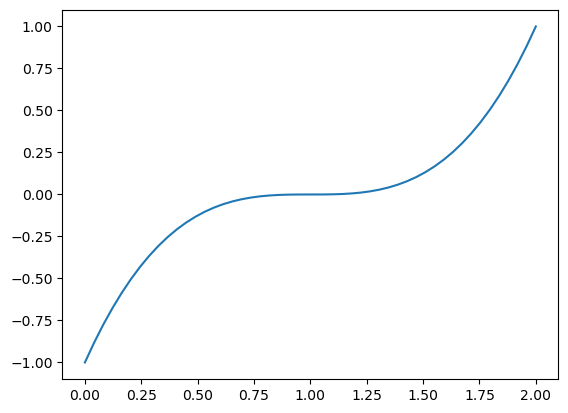

In [219]:
x = np.linspace(0,2)
func2 = lambda x: (x-1)**3
dfunc2 = lambda x: 3*(x-1)**2
y = func2(x)
plt.plot(x, y)

1. Подобрать начальное приближение и решить задачу

In [220]:
ddfunc2 = lambda x: 6*(x-1)
x0 = 1.2
data = simple_newton(func2, dfunc2, x0)
print('sol = ', data[0])
print('iter = ', data[1])
# print('dxs: ', data[2])
x_dots = [x0]
for i in range (data[1]):
    x_dots.append(x_dots[i] + data[2][i])
    # print(x_dots[i] + data[2][i], "\n")
for i in range (data[1]):
    print(1 - ((dfunc2(x_dots[i]))**2 - (func2(x_dots[i])*(ddfunc2(x_dots[i]))))/((dfunc2(x_dots[i]))**2))

More then 30 iterations!
sol =  nan
iter =  30
0.6666666666666667
0.6666666666666665
0.6666666666666667
0.6666666666666666
0.6666666666666665
0.6666666666666663
0.6666666666666667
0.6666666666666667
0.6666666666666666
0.6666666666666666
0.6666666666666667
0.6666666666666667
0.6666666666666665
0.6666666666666665
0.6666666666666665
0.6666666666666669
0.666666666666667
0.6666666666666667
0.6666666666666665
0.6666666666666666
0.6666666666666666
0.6666666666666667
0.6666666666666667
0.6666666666666665
0.6666666666666666
0.6666666666666669
0.6666666666666667
0.6666666666666667
0.666666666666667
0.6666666666666665


Заметим, что $\forall x \hookrightarrow f(x)*f^{"}(x) = 6(x-1)^4 > 0 $, а также $f^{'}$ и $f^{"}$ непрерывны на R. Но корень лежит на [0.75; 1.25], и на концах этого отрезка $f^{"}$ не знакопостоянна (на самом деле на концах любого отрезка такого, что $f(a)f(b) > 0$). Однако это всё относится к достаточному условию сходимости.

Можно проверить сходимоть по условию $|\frac{d\phi}{dx}| <= q < 1$, где $\phi = x_{n+1}$ - условие выполняется (смотреть данные выше). За 30 итераций без учёта кратности корня только при достаточно точном нулевом приближении метод успевает сойтись. Однако с учётом кратности корня получим:

In [221]:
ddfunc2 = lambda x: 6*(x-1)
x0 = 1.2
data = modded_newton(func2, dfunc2, x0, 3)
print('sol = ', data[0])
print('iter = ', data[1])
# print('dxs: ', data[2])

sol =  1.0
iter =  2


Поэтому в соответствии с критерием сходимости, можно выбрать почти любое нулевое приближение, вопрос только в том, какое количество итераций нам понадобится и какой метод мы будем для этого использовать

## Нелинейное уравнение 4

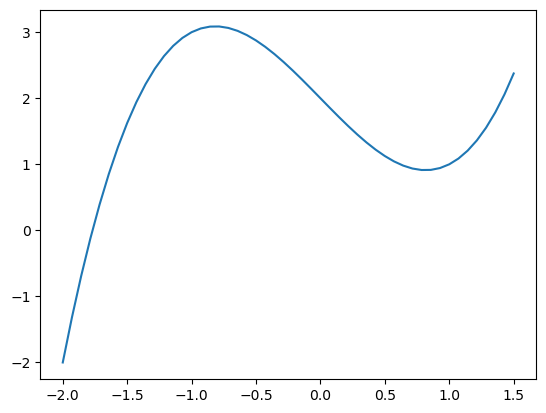

In [222]:
x = np.linspace(-2,1.5)
#x = np.linspace(-5,5)
func3 = lambda x: x**3 - 2*x + 2
dfunc3 = lambda x: 3*x**2 - 2
y = func3(x)
plt.plot(x, y)

1. Почему не находится решение во втором случае?

In [223]:
data = simple_newton(func3, dfunc3, 0.5) # случай 1
#data = simple_newton(func3, dfunc3, 0) # случай 2
print('sol = ', data[0])
print('iter = ', data[1])
x_dots = [0.5]
print("x_n:\n")
for i in range (data[1]):
    x_dots.append(x_dots[i] + data[2][i])
    print(x_dots[i] + data[2][i])

sol =  -1.7692923542386314
iter =  10
x_n:

1.4
0.8989690721649484
-1.2887793276654596
-2.105767299013565
-1.8291999504602496
-1.771715812062107
-1.76929656115579
-1.769292354251341
-1.7692923542386314
-1.7692923542386314


In [224]:
#data = simple_newton(func3, dfunc3, 0.5) # случай 1
data = simple_newton(func3, dfunc3, 0) # случай 2
print('sol = ', data[0])
print('iter = ', data[1])
x_dots = [0]
for i in range (data[1]):
    x_dots.append(x_dots[i] + data[2][i])
    print(x_dots[i] + data[2][i])

More then 30 iterations!
sol =  nan
iter =  30
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0


Решение не находится, потому что происходят так называеме биения: при определённых параметрах поиск решения может зациклится и никогда не достичь окрестности корня, это прозрачно видно по значениям сверху.

In [226]:
#data = simple_newton(func3, dfunc3, 0.5) # случай 1
data = modded_newton(func3, dfunc3, 0) # случай 2
print('sol = ', data[0])
print('iter = ', data[1])

sol =  -1.7692923542386314
iter =  43


Как видно, для нашего случая поправка в modded_newton сработала, однако я подозреваю, что можно подобрать такие функции и параметры, что цикл будет состоять не из двух точек, а из большего количества, тогда предложенное решение не сработает. На ум приходит пока только одно строгое решение для исключения биения - проверка значения $x$ на данной итерации со значениями $x$ на всех предыдущих. Однако это далеко не оптимально по времени (да и по памяти тоже) и возможно есть алгоритмы менее ресурсозатратные.